In [ ]:
# Stock Profits vs US Bond Rate
## Question : Is there a correlation between Stock Price trends and Treasury Bond Rate trends? Will examine this by calculating the stock data over a span of 10 years.
## Conclusion : Based on an analysis of ten years of data, stock prices and 2 year Treasury Bond Rate exhibited similar trends over time.
## Monthly closing Stock price and US Bond rate (y-axis), Year, Month combined (x-axis) for 10 years

# Part 1: Find Monthly Closing Stock Price in US

In [1]:
# Common_Stockdata.get_stock_data Module import
from Common_Module.Common_Stockdata import get_stock_data
from Common_Module.Common_TreasuryBond import get_year2BondRate_Data_data
from Common_Module.Common_TreasuryBond import get_year10BondRate_Data_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [2]:
# Load the Stock DataFrame using the function from common module
stock_info_df = get_stock_data()
stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1089,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1090,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1091,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1092,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1093,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3600,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3601,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3602,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3603,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [3]:
# Monthly Stock Closing dataFrame
# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\3413687937.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2010,January,46.42
1,2010,February,43.26
2,2010,March,45.41
3,2010,April,48.16
4,2010,May,49.93
...,...,...,...
115,2019,August,190.15
116,2019,September,185.65
117,2019,October,187.27
118,2019,November,198.87


# Part 2: Find Monthly Closing US 2 year Treasury Bond Rate

In [4]:
# Load the 2 Year Treasury Bond DataFrame using the function from common module
Year2BondRate_Data_df = get_year2BondRate_Data_data()
Year2BondRate_Data_df["Date"] = Year2BondRate_Data_df["Date"].astype('datetime64[ns]')
Year2BondRate_Data_df

,Date,Year2Bond_Rate,Year,Month,Day
0,2010-01-01,.,2010,1.0,01
1,2010-01-04,1.09,2010,1.0,04
2,2010-01-05,1.01,2010,1.0,05
3,2010-01-06,1.01,2010,1.0,06
4,2010-01-07,1.03,2010,1.0,07
...,...,...,...,...,...
2603,2019-12-25,.,2019,12.0,25
2604,2019-12-26,1.64,2019,12.0,26
2605,2019-12-27,1.59,2019,12.0,27
2606,2019-12-30,1.58,2019,12.0,30


In [8]:
# Extract 'Year' and 'Month' from 'Date'
Year2BondRate_Data_df['Year'] = Year2BondRate_Data_df['Date'].dt.year
Year2BondRate_Data_df['Month'] = Year2BondRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name
Year2BondRate_Data_df.rename(columns={'Year2Bond_Rate': 'Rate'}, inplace=True)   # Rename "Interest_Rate" column to "Rate"


# Optionally, rearrange columns if needed
Year2BondRate_Data_df = Year2BondRate_Data_df[['Year', 'Month', 'Date', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
Year2BondRate_Data_df['Rate'] = pd.to_numeric(Year2BondRate_Data_df['Rate'], errors='coerce')
Year2BondRate_Data_df["Year"] = Year2BondRate_Data_df["Year"].astype('str')


Year2BondRate_Data_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\345692406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2BondRate_Data_df['Rate'] = pd.to_numeric(Year2BondRate_Data_df['Rate'], errors='coerce')
C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\345692406.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year2BondRate_Data_df["Year"] = Year2BondRate_Data_df["Year"].astype('str')


,Year,Month,Date,Rate
0,2010,January,2010-01-01,NaN
1,2010,January,2010-01-04,1.09
2,2010,January,2010-01-05,1.01
3,2010,January,2010-01-06,1.01
4,2010,January,2010-01-07,1.03
...,...,...,...,...
2603,2019,December,2019-12-25,NaN
2604,2019,December,2019-12-26,1.64
2605,2019,December,2019-12-27,1.59
2606,2019,December,2019-12-30,1.58


In [9]:
# 2 Year Treasury Bond Monthly Closing Rate dataFrame -2
Year2BondRate_monthly_data = Year2BondRate_Data_df.groupby(['Year', 'Month'])
last_rate = Year2BondRate_monthly_data['Rate'].last().reset_index()

# dataFrame creation
Year2Bond_Monchng_df = pd.DataFrame({
                                    'Year': last_rate['Year'],
                                    'Month': last_rate['Month'],
                                    '2yearRate': last_rate['Rate']
                                   })
Year2Bond_Monchng_df

,Year,Month,2yearRate
0,2010,April,0.97
1,2010,August,0.47
2,2010,December,0.61
3,2010,February,0.81
4,2010,January,0.82
...,...,...,...
115,2019,March,2.27
116,2019,May,1.95
117,2019,November,1.61
118,2019,October,1.52


# Part 3: Find Monthly Closing US 10 year Treasury Bond Rate

In [10]:
# Load the 10 Year Treasury Bond DataFrame using the function from common module
Year10BondRate_Data_df = get_year10BondRate_Data_data()
Year10BondRate_Data_df["Date"] = Year10BondRate_Data_df["Date"].astype('datetime64[ns]')
Year10BondRate_Data_df

,Date,Year10Bond_Rate,Year,Month,Day
0,2010-01-01,.,2010,1.0,01
1,2010-01-04,3.85,2010,1.0,04
2,2010-01-05,3.77,2010,1.0,05
3,2010-01-06,3.85,2010,1.0,06
4,2010-01-07,3.85,2010,1.0,07
...,...,...,...,...,...
2603,2019-12-25,.,2019,12.0,25
2604,2019-12-26,1.90,2019,12.0,26
2605,2019-12-27,1.88,2019,12.0,27
2606,2019-12-30,1.90,2019,12.0,30


In [11]:
# Extract 'Year' and 'Month' from 'Date'
Year10BondRate_Data_df['Year'] = Year10BondRate_Data_df['Date'].dt.year
Year10BondRate_Data_df['Month'] = Year10BondRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name
Year10BondRate_Data_df.rename(columns={'Year10Bond_Rate': 'Rate'}, inplace=True)   # Rename "Interest_Rate" column to "Rate"


# Optionally, rearrange columns if needed
Year10BondRate_Data_df = Year10BondRate_Data_df[['Year', 'Month', 'Date', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
Year10BondRate_Data_df['Rate'] = pd.to_numeric(Year10BondRate_Data_df['Rate'], errors='coerce')
Year10BondRate_Data_df["Year"] = Year10BondRate_Data_df["Year"].astype('str')


Year10BondRate_Data_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\1348401421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year10BondRate_Data_df['Rate'] = pd.to_numeric(Year10BondRate_Data_df['Rate'], errors='coerce')
C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\1348401421.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Year10BondRate_Data_df["Year"] = Year10BondRate_Data_df["Year"].astype('str')


,Year,Month,Date,Rate
0,2010,January,2010-01-01,NaN
1,2010,January,2010-01-04,3.85
2,2010,January,2010-01-05,3.77
3,2010,January,2010-01-06,3.85
4,2010,January,2010-01-07,3.85
...,...,...,...,...
2603,2019,December,2019-12-25,NaN
2604,2019,December,2019-12-26,1.90
2605,2019,December,2019-12-27,1.88
2606,2019,December,2019-12-30,1.90


In [12]:
# 10 Year Treasury Bond Monthly Closing Rate dataFrame -2
Year10BondRate_monthly_data = Year10BondRate_Data_df.groupby(['Year', 'Month'])
last_rate = Year10BondRate_monthly_data['Rate'].last().reset_index()

# dataFrame creation
Year10Bond_Monchng_df = pd.DataFrame({
                                    'Year': last_rate['Year'],
                                    'Month': last_rate['Month'],
                                    '10yearRate': last_rate['Rate']
                                   })
Year10Bond_Monchng_df

,Year,Month,10yearRate
0,2010,April,3.69
1,2010,August,2.47
2,2010,December,3.30
3,2010,February,3.61
4,2010,January,3.63
...,...,...,...
115,2019,March,2.41
116,2019,May,2.14
117,2019,November,1.78
118,2019,October,1.69


# Part 3: Creating combined Monthly Closing Price & 2,10 Year Treasury Bond Monthly change

In [13]:
# Merge three dataFrame (Nasdaq Monthly Closing Price + 2,10 Year Treasury Bond Monthly Closing Rate)

MonthlyProfit_USBond_df = pd.merge(monthly_close_final_df, Year2Bond_Monchng_df, on= ["Year","Month"], how="inner")
MonthlyProfit_USBond_df = pd.merge(MonthlyProfit_USBond_df, Year10Bond_Monchng_df, on= ["Year","Month"], how="inner")
MonthlyProfit_USBond_df

,Year,Month,Monthly_Close,2yearRate,10yearRate
0,2010,January,46.42,0.82,3.63
1,2010,February,43.26,0.81,3.61
2,2010,March,45.41,1.02,3.84
3,2010,April,48.16,0.97,3.69
4,2010,May,49.93,0.76,3.31
...,...,...,...,...,...
115,2019,August,190.15,1.50,1.50
116,2019,September,185.65,1.63,1.68
117,2019,October,187.27,1.52,1.69
118,2019,November,198.87,1.61,1.78


# Line Plot of Monthly Stock Closing Price and 2,10 year US Bond Monthly Closing Rate

C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\2275606881.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyProfit_USBond_df['Date'] = pd.to_datetime(MonthlyProfit_USBond_df['Year'].astype(str) + ' ' + MonthlyProfit_USBond_df['Month'])
C:\Users\junhy\AppData\Local\Temp\ipykernel_29436\2275606881.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyProfit_USBond_df['Date'] = pd.to_datetime(MonthlyProfit_USBond_df['Year'].astype(str) + ' ' + MonthlyProfit_USBond_df['Month'])


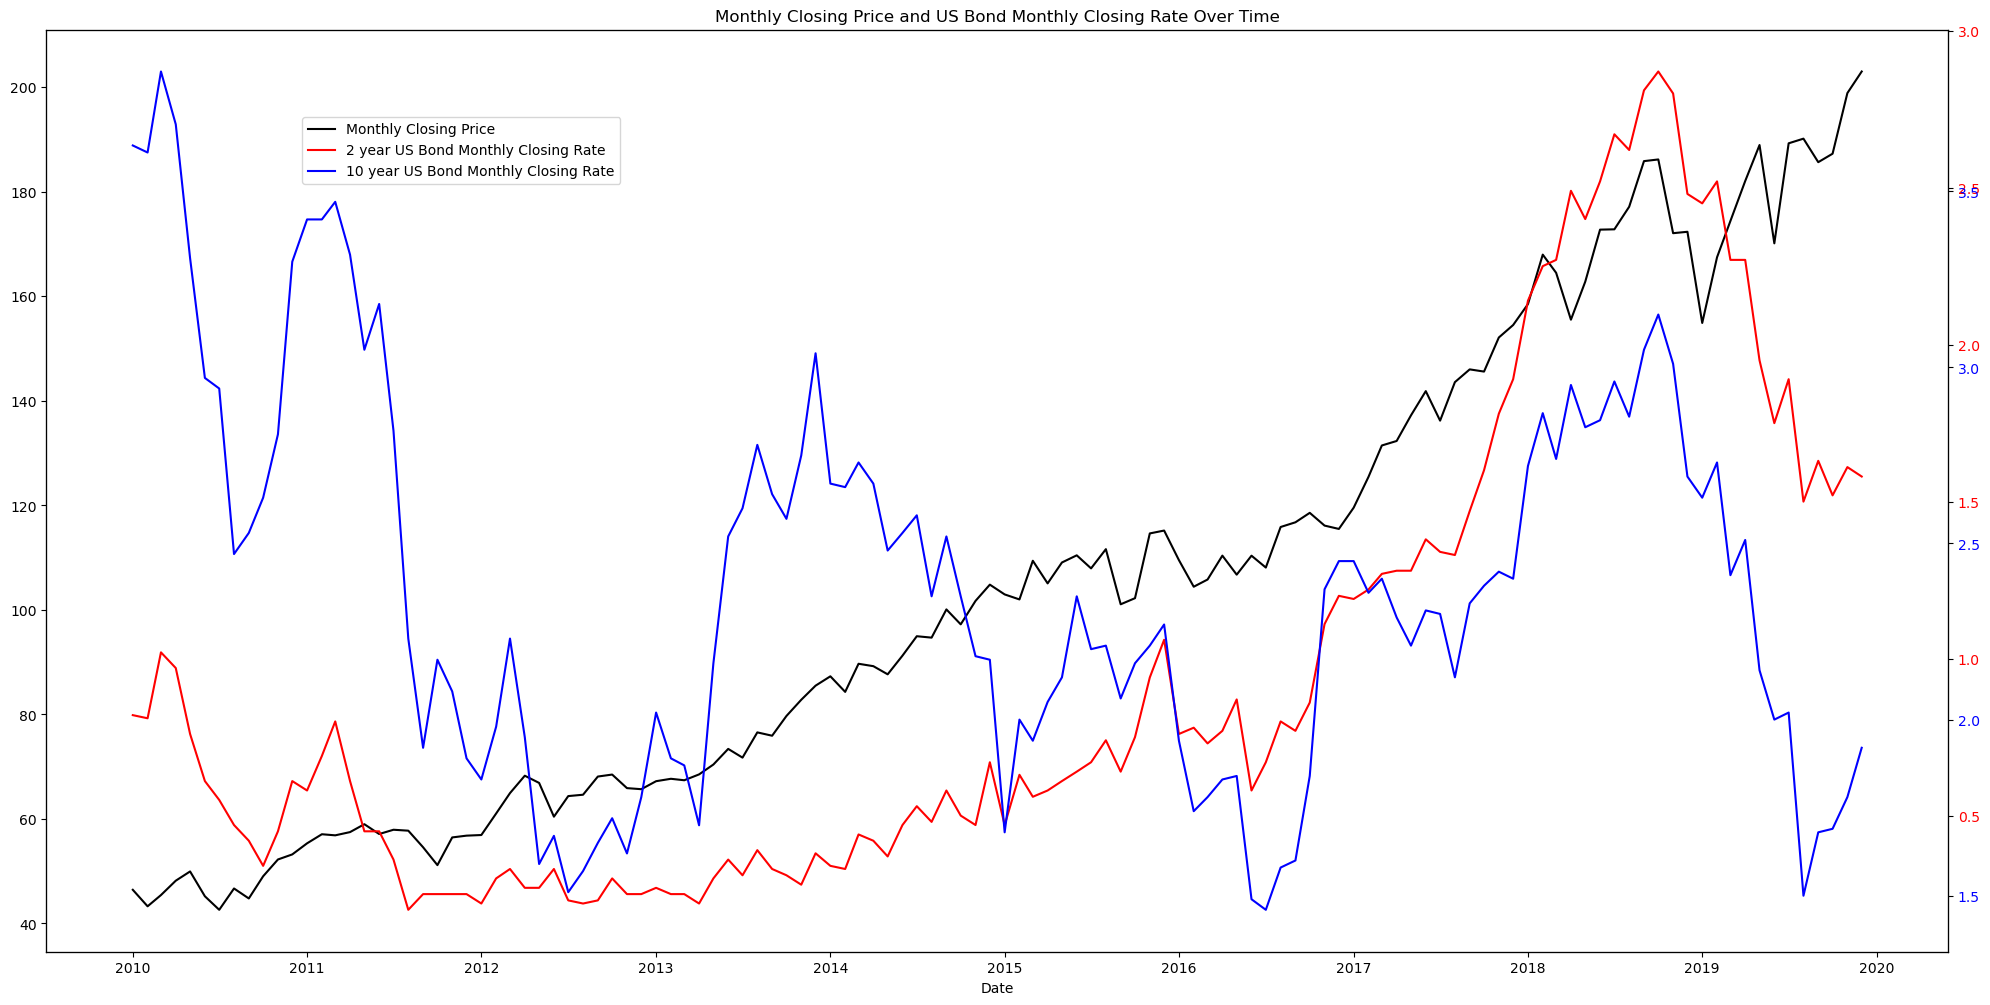

In [14]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyProfit_USBond_df['Date'] = pd.to_datetime(MonthlyProfit_USBond_df['Year'].astype(str) + ' ' + MonthlyProfit_USBond_df['Month'])

# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyProfit_USBond_df['Date'] = pd.to_datetime(MonthlyProfit_USBond_df['Year'].astype(str) + ' ' + MonthlyProfit_USBond_df['Month'])

# Plotting
fig, ax1 = plt.subplots(figsize=(20,10))

# Create first plot - Monthly Stock Closing Price
color = 'black'
ax1.set_xlabel('Date')
ax1.plot(MonthlyProfit_USBond_df['Date'], MonthlyProfit_USBond_df['Monthly_Close'], color=color, label='Monthly Closing Price')
ax1.tick_params(axis='y', labelcolor=color)

# Create second plot - 2 year US Bond Monthly Closing Rate
ax2 = ax1.twinx()  
color = 'red'
ax2.plot(MonthlyProfit_USBond_df['Date'], MonthlyProfit_USBond_df['2yearRate'], color=color, label='2 year US Bond Monthly Closing Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Create third plot - 10 year US Bond Monthly Closing Rate
ax3 = ax1.twinx()  
color = 'blue'
ax3.plot(MonthlyProfit_USBond_df['Date'], MonthlyProfit_USBond_df['10yearRate'], color=color, label='10 year US Bond Monthly Closing Rate')
ax3.tick_params(axis='y', labelcolor=color)

# Show the plot
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.15,0.9))
plt.title('Monthly Closing Price and US Bond Monthly Closing Rate Over Time')
plt.show()
